# Loading the model

In [1]:
import torch
from torchvision.models import resnet34


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = resnet34(pretrained=True)
model = model.to(device)

# Defining the hook

In [2]:
class SaveOutput:
    def __init__(self):
        self.outputs = []
        
    def __call__(self, module, module_in, module_out):
        self.outputs.append(module_out)
        
    def clear(self):
        self.outputs = []

# Registering the hook
We register the hook to each convolutional layer.

In [3]:
save_output = SaveOutput()

hook_handles = []

for layer in model.modules():
    if isinstance(layer, torch.nn.modules.conv.Conv2d):
        handle = layer.register_forward_hook(save_output)
        hook_handles.append(handle)

# Forward pass

The hook is not called yet, so `save_output.outputs` should be empty.

In [4]:
len(save_output.outputs)

0

In [5]:
from PIL import Image
from torchvision import transforms as T

image = Image.open('cat.jpg')
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to(device)

out = model(X)

The hook was called by each convolutional layer during the forward pass, so the layer outputs are saved.

In [6]:
len(save_output.outputs)

36

We can visualize the intermediate results.

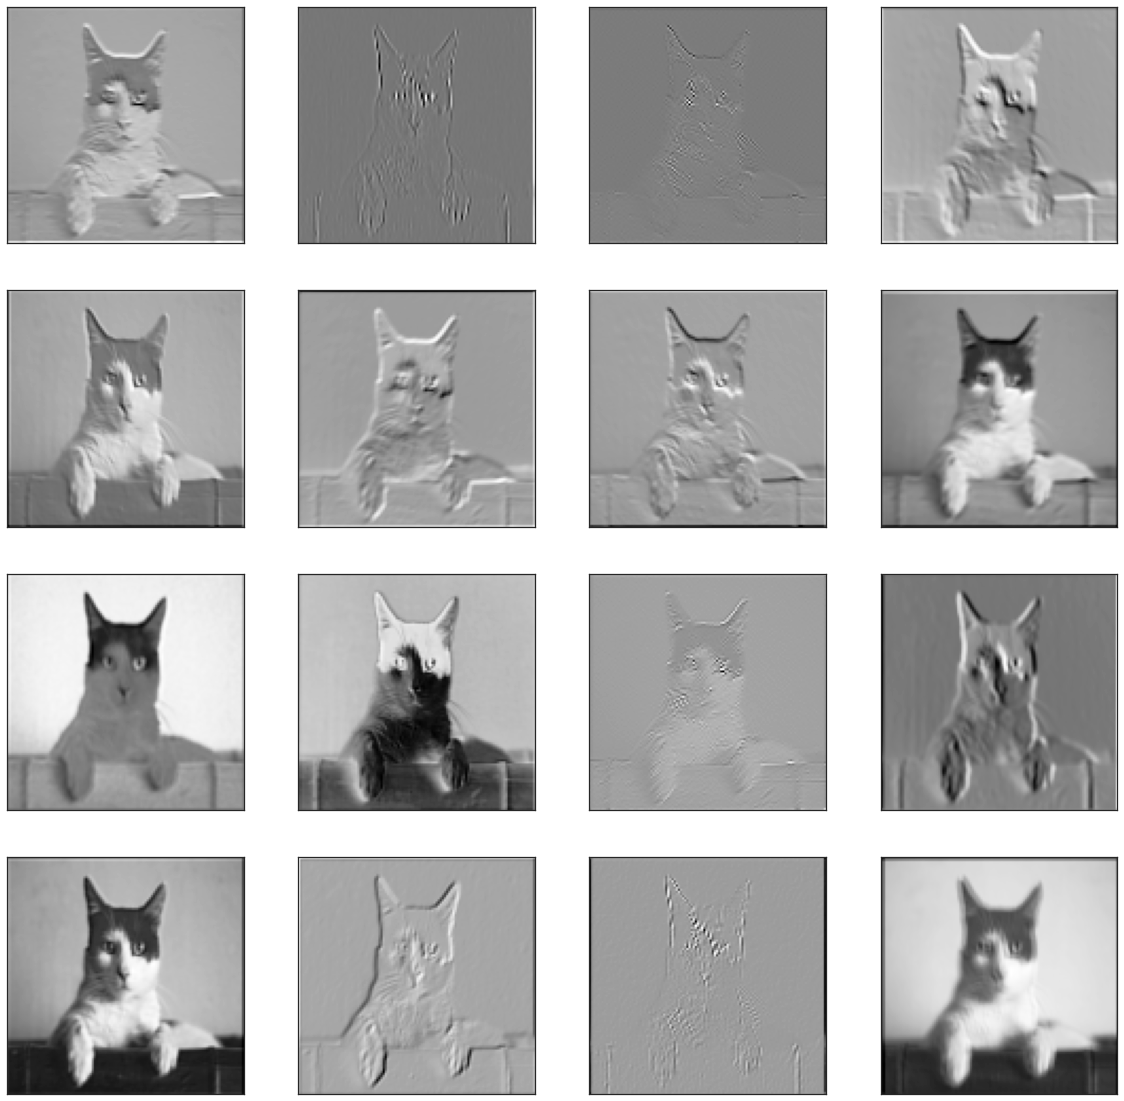

In [7]:
import matplotlib.pyplot as plt

def module_output_to_numpy(tensor):
    return tensor.detach().to('cpu').numpy()    

images = module_output_to_numpy(save_output.outputs[0])

with plt.style.context("seaborn-white"):
    plt.figure(figsize=(20, 20), frameon=False)
    for idx in range(16):
        plt.subplot(4, 4, idx+1)
        plt.imshow(images[0, idx])
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
        